In [39]:
! pip install tmdbsimple
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm_notebook

In [12]:
import json
with open ('/Users/Bijan Emadi/.secret/tmdb_api.json', 'r') as f:
    login = json.load(f)
login.keys()

dict_keys(['api-key'])

In [13]:
import tmdbsimple as tmdb
tmdb.API_KEY = login['api-key']

In [14]:
movie = tmdb.Movies(603)
info = movie.info()
info

{'adult': False,
 'backdrop_path': '/ncEsesgOJDNrTUED89hYbA117wo.jpg',
 'belongs_to_collection': {'id': 2344,
  'name': 'The Matrix Collection',
  'poster_path': '/bV9qTVHTVf0gkW0j7p7M0ILD4pG.jpg',
  'backdrop_path': '/bRm2DEgUiYciDw3myHuYFInD7la.jpg'},
 'budget': 63000000,
 'genres': [{'id': 28, 'name': 'Action'},
  {'id': 878, 'name': 'Science Fiction'}],
 'homepage': 'http://www.warnerbros.com/matrix',
 'id': 603,
 'imdb_id': 'tt0133093',
 'original_language': 'en',
 'original_title': 'The Matrix',
 'overview': 'Set in the 22nd century, The Matrix tells the story of a computer hacker who joins a group of underground insurgents fighting the vast and powerful computers who now rule the earth.',
 'popularity': 64.482,
 'poster_path': '/f89U3ADr1oiB1s9GkdPOEpXUk5H.jpg',
 'production_companies': [{'id': 79,
   'logo_path': '/tpFpsqbleCzEE2p5EgvUq6ozfCA.png',
   'name': 'Village Roadshow Pictures',
   'origin_country': 'US'},
  {'id': 372,
   'logo_path': None,
   'name': 'Groucho II Film

In [15]:
def get_movie_with_rating(movie_id):
    # Get the movie object for the current id
    movie = tmdb.Movies(movie_id)
    # save the .info .releases dictionaries
    info = movie.info()
    releases = movie.releases()
    # Loop through countries in releases
    for c in releases['countries']:
        # if the country abbreviation==US
        if c['iso_3166_1' ] =='US':
            ## save a "certification" key in the info dict with the certification
            info['certification'] = c['certification']
    return info

In [16]:
def write_json(new_data, filename):
    
    with open(filename, 'r+') as file:
        file_data = json.load(file)
        if (type(new_data)==list) & (type(file_data)==list):
            file_data.extend(new_data)
        else:
            file_data.append(new_data)
        file.seek(0)
        json.dump(file_data, file)

In [17]:
get_movie_with_rating(603)

{'adult': False,
 'backdrop_path': '/ncEsesgOJDNrTUED89hYbA117wo.jpg',
 'belongs_to_collection': {'id': 2344,
  'name': 'The Matrix Collection',
  'poster_path': '/bV9qTVHTVf0gkW0j7p7M0ILD4pG.jpg',
  'backdrop_path': '/bRm2DEgUiYciDw3myHuYFInD7la.jpg'},
 'budget': 63000000,
 'genres': [{'id': 28, 'name': 'Action'},
  {'id': 878, 'name': 'Science Fiction'}],
 'homepage': 'http://www.warnerbros.com/matrix',
 'id': 603,
 'imdb_id': 'tt0133093',
 'original_language': 'en',
 'original_title': 'The Matrix',
 'overview': 'Set in the 22nd century, The Matrix tells the story of a computer hacker who joins a group of underground insurgents fighting the vast and powerful computers who now rule the earth.',
 'popularity': 64.482,
 'poster_path': '/f89U3ADr1oiB1s9GkdPOEpXUk5H.jpg',
 'production_companies': [{'id': 79,
   'logo_path': '/tpFpsqbleCzEE2p5EgvUq6ozfCA.png',
   'name': 'Village Roadshow Pictures',
   'origin_country': 'US'},
  {'id': 372,
   'logo_path': None,
   'name': 'Groucho II Film

In [18]:
import os
FOLDER = "Data/"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)

['.ipynb_checkpoints',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'title_akas.csv.gz',
 'title_basics.csv.gz',
 'title_ratings.csv.gz',
 'tmdb_api_results_2000.json',
 'tmdb_api_results_2001.json']

In [19]:
basics = pd.read_csv('Data/title_basics.csv.gz')
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,NaN,118,"Comedy,Fantasy,Romance"
1,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El Tango del Viudo y Su Espejo Deformante,0,2020,NaN,70,Drama
2,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,NaN,122,Drama
3,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005,NaN,100,"Comedy,Horror,Sci-Fi"
4,tt0093119,movie,Grizzly II: Revenge,Grizzly II: The Predator,0,2020,NaN,74,"Horror,Music,Thriller"


In [20]:
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79287 entries, 0 to 79286
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          79287 non-null  object 
 1   titleType       79287 non-null  object 
 2   primaryTitle    79287 non-null  object 
 3   originalTitle   79287 non-null  object 
 4   isAdult         79287 non-null  int64  
 5   startYear       79287 non-null  int64  
 6   endYear         0 non-null      float64
 7   runtimeMinutes  79287 non-null  int64  
 8   genres          79287 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 5.4+ MB


In [21]:
YEARS_TO_GET = [2000,2001]

In [22]:
YEAR = YEARS_TO_GET[0]
YEAR

2000

In [ ]:
# Start of OUTER Loop
for YEAR in tqdm_notebook(YEARS_TO_GET, desc='YEARS',
                         position=0):
    # Defining the JSON file to store results for year
    JSON_FILE = f'{FOLDER}tmdb_api_results_{YEAR}.json'
    # Check if file exists
    file_exists = os.path.isfile(JSON_FILE)

    if file_exists == False:
        with open(JSON_FILE,'w') as f:
            json.dump([{'imdb_id':0}],f)

    # Saving new year as the current df
    df = basics.loc[basics['startYear']==YEAR].copy()
    # Saving movie IDs to list
    movie_ids = df['tconst'].copy()
    movie_ids

    # Load existing data from json into a dataframe called 'previous_df'
    previous_df = pd.read_json(JSON_FILE)
    previous_df

    movie_ids_to_get = movie_ids[~movie_ids.isin(previous_df['imdb_id'])]

    #Get index and movie id from list
    # INNER Loop
    for movie_id in tqdm_notebook(movie_ids_to_get,
                                 desc=f'Movies from {YEAR}',
                                 position=1,
                                 leave=True):
        # Attempt to retrieve then data for the movie id
        try:
            temp = get_movie_with_rating(movie_id) # This uses your pre-made function
            # Append/extend results to existing file using a pre-made function
            write_json(temp, JSON_FILE)
            # Short 20 ms sleep to prevent overwhelming server
            time.sleep(0.02)

        except Exception as e:
            continue
    try:
        
            
        final_year_df = pd.read_json(JSON_FILE)
        final_year_df.to_csv(f"{FOLDER}final_tmdb_data_{YEAR}.csv.gz", compression="gzip", index=False)
        
    except:
        print(f'Error loading final {JSON_FILE}')

In [23]:
Movies_2000 = pd.read_csv(r'Data/final_tmdb_data_2000.csv.gz')
Movies_2001 = pd.read_csv(r'Data/final_tmdb_data_2001.csv.gz')

In [24]:
Movies_2000.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.4,21.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,4.4,7.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1882.0,PG


In [25]:
Movies_2001.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.0,/ab5yL8zgRotrICzGbEl10z24N71.jpg,NaN,48000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 14, 'nam...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,If they lived in the same century they'd be pe...,Kate & Leopold,0.0,6.3,1117.0,PG-13
2,tt0114447,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,151007.0,en,The Silent Force,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,0.0,5.0,3.0,NaN
3,tt0118589,0.0,/bLntSfsqUheiUirdV9Ts8znqsTM.jpg,NaN,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,10696.0,en,Glitter,...,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.0,4.6,115.0,PG-13
4,tt0118652,0.0,/mWxJEFRMvkG4UItYJkRDMgWQ08Y.jpg,NaN,1000000.0,"[{'id': 9648, 'name': 'Mystery'}, {'id': 27, '...",NaN,17140.0,en,The Attic Expeditions,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,His search for peace of mind... will leave his...,The Attic Expeditions,0.0,5.1,28.0,R


In [26]:
Movies_2000['Year'] = 2000

In [27]:
Movies_2001['Year'] = 2001

In [28]:
df_merge=pd.concat([Movies_2000, Movies_2001], axis=0)

In [29]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2479 entries, 0 to 1280
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2479 non-null   object 
 1   adult                  2477 non-null   float64
 2   backdrop_path          1257 non-null   object 
 3   belongs_to_collection  194 non-null    object 
 4   budget                 2477 non-null   float64
 5   genres                 2477 non-null   object 
 6   homepage               173 non-null    object 
 7   id                     2477 non-null   float64
 8   original_language      2477 non-null   object 
 9   original_title         2477 non-null   object 
 10  overview               2424 non-null   object 
 11  popularity             2477 non-null   float64
 12  poster_path            2173 non-null   object 
 13  production_companies   2477 non-null   object 
 14  production_countries   2477 non-null   object 
 15  rele

Exploratory Data Analysis

1. How many movies had at least some valid financial information? (Values > 0 for budget OR revenue?)

In [30]:
df_merge = df_merge.dropna(subset=['budget','revenue'])

In [32]:
df_money = df_merge[(df_merge['budget'] > 0) | (df_merge['revenue'] > 0)]

In [36]:
df_money.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,Year
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.4,21.0,NaN,2000
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1882.0,PG,2000
6,tt0119273,0.0,/fClJrAmJQ90zg9gWnfHVYSMiDTv.jpg,"{'id': 141086, 'name': 'Heavy Metal Collection...",15000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,16225.0,en,Heavy Metal 2000,...,88.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,not to survive the fight in the external world...,Heavy Metal 2000,0.0,6.1,151.0,R,2000
10,tt0120263,0.0,/ynXVuylP8upazjz8lrqb1PEMkdR.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,34070.0,sv,Sånger från andra våningen,...,98.0,"[{'english_name': 'Russian', 'iso_639_1': 'ru'...",Released,NaN,Songs from the Second Floor,0.0,7.2,206.0,NaN,2000
11,tt0120467,0.0,/knok3mNReKqPTplnnqz7E4dd7mD.jpg,NaN,120000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,19085.0,en,Vulgar,...,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,0.0,5.4,41.0,R,2000


2. How many movies are there in each of the certification categories?

In [37]:
df_merge['certification'].value_counts()

R          449
PG-13      180
NR          63
PG          62
G           24
NC-17        6
Unrated      1
-            1
Name: certification, dtype: int64

3. What is the average revenue per certification category?

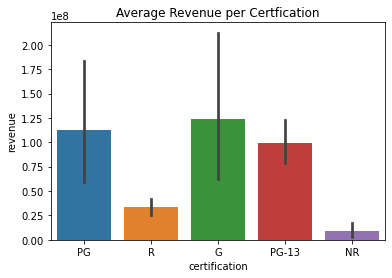

In [46]:
chart=sns.barplot(x=df_money['certification'], y=df_money['revenue'])
chart.set_title('Average Revenue per Certfication');

4. What is the average budget per certification category?

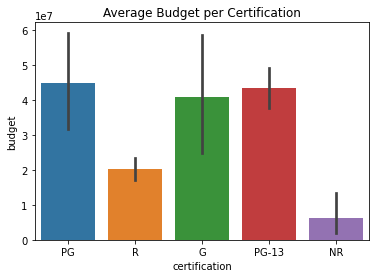

In [48]:
chart=sns.barplot(x=df_money['certification'], y=df_money['budget'])
chart.set_title('Average Budget per Certification');